In [1]:
import csv
import time
import random
import requests
from lxml import etree
import pandas as pd
import numpy as np

In [2]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
yelp =pd.read_csv('yelp.csv')
df = pd.read_csv('merged_df.csv')

In [5]:
yelp = yelp.drop(columns=['Unnamed: 0'])
yelp.columns

Index(['city', 'restaurant', 'rank', 'point', 'review_n', 'username',
       'location', 'has_profile', 'friend', 'review', 'photo', 'text', 'date',
       'rating', 'fake', 'local', 'compound', 'positive', 'negative',
       'neutral', 'word_count', 'sentence_length', 'adj_POS', 'I_pronoun',
       'past_tense', 'rating_dev', 'ttr', 'verb_POS', 'pron_POS', 'adv_POS',
       'prep_POS', 'conj_POS', 'you_pronoun', '3rd_pronoun', 'present_tense',
       'future_tense'],
      dtype='object')

In [4]:
description =yelp.head()
display(description)

,city,restaurant,rank,point,review_n,username,location,has_profile,friend,review,...,ttr,verb_POS,pron_POS,adv_POS,prep_POS,conj_POS,you_pronoun,3rd_pronoun,present_tense,future_tense
0,Alameda,Jong Ga House,236,4.0,2300.0,Ernesto B.,"Oakland, CA",0.0,0.0,1.0,...,0.840000,0.100000,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.050000,0.000000
1,Alameda,Jong Ga House,236,4.0,2300.0,Katrina F.,"San Francisco, CA",1.0,914.0,101.0,...,0.551220,0.228022,0.123626,0.057692,0.129121,0.043956,0.013736,0.041209,0.032967,0.021978
2,Alameda,Jong Ga House,236,4.0,2300.0,Mario V.,"San Francisco, CA",1.0,86.0,13.0,...,0.497600,0.205882,0.130515,0.075368,0.117647,0.023897,0.007353,0.031250,0.038603,0.016544
3,Alameda,Jong Ga House,236,4.0,2300.0,Giselle A.,"Martinez, CA",1.0,240.0,15.0,...,0.789474,0.183673,0.091837,0.091837,0.112245,0.030612,0.040816,0.010204,0.061224,0.061224
4,Alameda,Jong Ga House,236,4.0,2300.0,Seth E.,"Dublin, CA",1.0,249.0,40.0,...,0.649746,0.224719,0.095506,0.101124,0.089888,0.028090,0.022472,0.011236,0.028090,0.000000


In [7]:
description =df.head()
display(description)

,city,restaurant,review_count,fake_review_count,percent,percent_ne_non,percent_po_non,percent_ne_re,percent_po_re,point
0,Alameda,Jong Ga House,2325,125,0.051020,0.016260,0.609756,0.045546,0.433934,4.0
1,Alameda,Brendas Oakland,1064,41,0.037104,0.076923,0.692308,0.109415,0.455471,3.9
2,Alameda,Homeroom,6486,821,0.112358,0.032887,0.585871,0.044376,0.437908,4.1
3,Alameda,Yojimbo,1673,66,0.037953,0.092308,0.615385,0.092086,0.391367,3.9
4,Alameda,Quinns Lighthouse,1030,67,0.061076,0.230769,0.446154,0.128205,0.257525,3.5


In [6]:
df['total_review_count'] = df['review_count'] + df['fake_review_count']

In [32]:
df.describe()

,review_count,fake_review_count,percent,percent_ne_non,percent_po_non,percent_ne_re,percent_po_re,point,total_review_count
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.00000
mean,728.028000,65.588000,0.072025,0.127302,0.579332,0.089978,0.509796,4.003600,793.61600
std,1221.013614,210.216087,0.049926,0.137917,0.238163,0.097690,0.172827,0.505431,1412.48112
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,167.000000,10.000000,0.044444,0.023955,0.456512,0.039701,0.400763,3.800000,179.25000
50%,398.000000,26.000000,0.063219,0.090909,0.591229,0.064110,0.501859,4.100000,426.00000
75%,847.000000,62.000000,0.087279,0.186342,0.737395,0.108675,0.631243,4.300000,904.50000
max,18556.000000,4389.000000,0.500000,1.000000,1.000000,1.000000,1.000000,5.000000,22945.00000


In [7]:
import re
import html

def remove_non_ascii(text):
    # 先解码 HTML 实体编码，然后再去除非 ASCII 字符
    text = html.unescape(str(text))
    return re.sub(r'[^\x00-\x7F]+', '', text)

# 在应用函数之前，确保 'text' 列中的所有值都是字符串
df['restaurant'] = df['restaurant'].apply(remove_non_ascii)
df['city'] = df['city'].apply(remove_non_ascii)
yelp['restaurant'] = yelp['restaurant'].apply(remove_non_ascii)
yelp['city'] = yelp['city'].apply(remove_non_ascii)

# merge data

In [8]:
merge = pd.merge(yelp, df, on=['city', 'restaurant'], how='left')

In [9]:
variables_to_drop = ['point_x', 'review_n']

# 使用 drop 方法删除指定的变量
merge = merge.drop(variables_to_drop, axis=1)

In [10]:
merge.rename(columns={'point_y': 'point'}, inplace=True)

drop

In [11]:
merge.drop(index=244667, inplace=True)

In [12]:
merge.drop(index=296705, inplace=True)
merge.drop(index=296707, inplace=True)

In [12]:
rows_with_greater_than_1 = df1[df1['rating_dev'] > 10]

# 打印符合条件的行的所有变量的取值情况
print("Rows with 'adv_POS' > 1:")
display(rows_with_greater_than_1)

NameError: name 'df1' is not defined

In [13]:
merge.drop(index=219837, inplace=True)
merge.drop(index=347203, inplace=True)
merge.drop(index=9570, inplace=True)
merge.drop(index=74254, inplace=True)

In [14]:
merge.columns

Index(['city', 'restaurant', 'rank', 'username', 'location', 'has_profile',
       'friend', 'review', 'photo', 'text', 'date', 'rating', 'fake', 'local',
       'compound', 'positive', 'negative', 'neutral', 'word_count',
       'sentence_length', 'adj_POS', 'I_pronoun', 'past_tense', 'rating_dev',
       'ttr', 'verb_POS', 'pron_POS', 'adv_POS', 'prep_POS', 'conj_POS',
       'you_pronoun', '3rd_pronoun', 'present_tense', 'future_tense',
       'review_count', 'fake_review_count', 'percent', 'percent_ne_non',
       'percent_po_non', 'percent_ne_re', 'percent_po_re', 'point',
       'total_review_count'],
      dtype='object')

处理变量

In [14]:
variables_to_abs = ['rating_dev']

# 对指定的变量取绝对值，并替换原数据
merge[variables_to_abs] = merge[variables_to_abs].abs()

In [15]:
merge['has_profile'] = 1 - merge['has_profile']

In [15]:
merge['non_recommend'] = merge['fake']

In [16]:
variables_to_drop = ['city', 'restaurant', 'username', 'location','text', 'date', 'percent_ne_non',
       'percent_po_non']

# 使用 drop 方法删除指定的变量
merge = merge.drop(variables_to_drop, axis=1)

In [17]:
merge['5'] = merge['rating'].apply(lambda x: 1 if x == 5 else 0)
merge['4'] = merge['rating'].apply(lambda x: 1 if x == 4 else 0)
merge['2'] = merge['rating'].apply(lambda x: 1 if x == 2 else 0)
merge['1'] = merge['rating'].apply(lambda x: 1 if x == 1 else 0)

In [17]:
merge.columns

Index(['rank', 'has_profile', 'friend', 'review', 'photo', 'rating', 'fake',
       'local', 'compound', 'positive', 'negative', 'neutral', 'word_count',
       'sentence_length', 'adj_POS', 'I_pronoun', 'past_tense', 'rating_dev',
       'ttr', 'verb_POS', 'pron_POS', 'adv_POS', 'prep_POS', 'conj_POS',
       'you_pronoun', '3rd_pronoun', 'present_tense', 'future_tense',
       'review_count', 'fake_review_count', 'percent', 'percent_ne_re',
       'percent_po_re', 'point', 'total_review_count', 'non_recommend', '5',
       '4', '2', '1'],
      dtype='object')

In [17]:
df['rest_review_count'] = df['total_review_count']
merge['user_review_count'] = merge['review']
merge['user_friend_count'] = merge['friend']

In [18]:
adjusted_order = [ 'rating', 'word_count','rest_review_count', 'point', 'user_friend_count', 'user_review_count', 'has_profile']

# 对merge的子集进行描述性统计
merge_describe = merge[['rating', 'word_count', 'user_review_count', 'user_friend_count', 'has_profile']].describe()

# 对df的子集进行描述性统计
df_describe = df[['rest_review_count', 'point']].describe()

# 合并统计结果，但保持调整后的顺序
combined_describe_adjusted = pd.concat([df_describe, merge_describe], axis=1)[adjusted_order]

# 移除count行并四舍五入到两位小数
combined_describe_adjusted_no_count = combined_describe_adjusted.drop('count').round(2)

# 显示调整顺序后且移除了count行的描述性统计表格
combined_describe_adjusted_no_count

,rating,word_count,rest_review_count,point,user_friend_count,user_review_count,has_profile
mean,4.03,96.17,793.62,4.00,114.98,124.80,0.72
std,1.24,94.56,1412.48,0.51,300.22,399.57,0.45
min,0.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,4.00,34.00,179.25,3.80,0.00,8.00,0.00
50%,4.00,66.00,426.00,4.10,13.00,28.00,1.00
75%,5.00,125.00,904.50,4.30,114.00,101.00,1.00
max,5.00,1728.00,22945.00,5.00,5000.00,20415.00,1.00


In [18]:
# 调整变量顺序
# 先排列 df 的列，然后是 merge 的列
adjusted_order = ['word_count',  
                  'rating','total_review_count', 'point', 
                   'friend', 'review', 'has_profile']

# 对merge的子集进行描述性统计
merge_describe = merge[['non_recommend', 'word_count', 'rating_dev', 'rating', 'friend', 'review', 'has_profile']].describe()

# 对df的子集进行描述性统计
df_describe = df[['total_review_count', 'point']].describe()

# 合并统计结果，但保持调整后的顺序
combined_describe_adjusted = pd.concat([df_describe, merge_describe], axis=1)[adjusted_order]

# 显示调整顺序后的描述性统计表格
combined_describe_adjusted.round(2)

,word_count,rating,total_review_count,point,friend,review,has_profile
count,486749.00,486749.00,750.00,750.00,486749.00,486749.00,486749.00
mean,96.17,4.03,793.62,4.00,114.98,124.80,0.72
std,94.56,1.24,1412.48,0.51,300.22,399.57,0.45
min,1.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,34.00,4.00,179.25,3.80,0.00,8.00,0.00
50%,66.00,4.00,426.00,4.10,13.00,28.00,1.00
75%,125.00,5.00,904.50,4.30,114.00,101.00,1.00
max,1728.00,5.00,22945.00,5.00,5000.00,20415.00,1.00


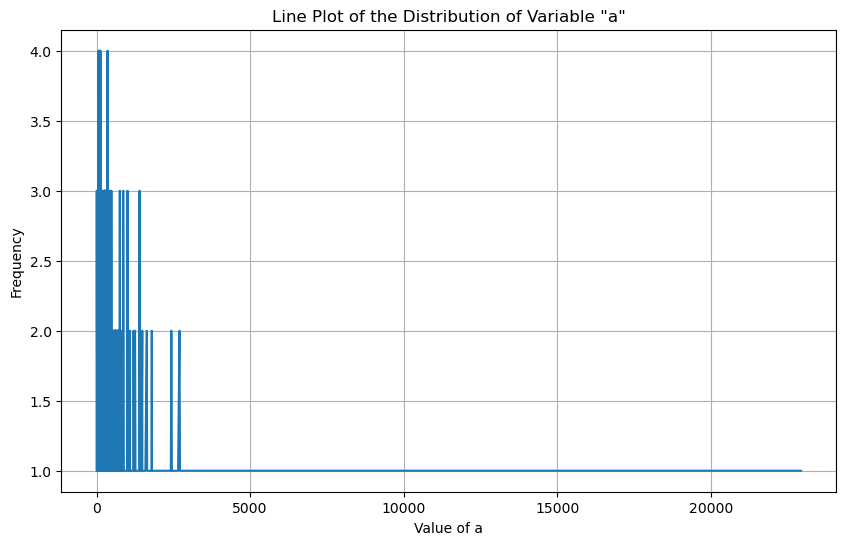

In [51]:
# 1. 计算 'a' 的每个独特值的频率
a_counts = df['total_review_count'].value_counts().sort_index()

# 2. 绘制折线图
plt.figure(figsize=(10, 6))
a_counts.plot(kind='line')
plt.title('Line Plot of the Distribution of Variable "a"')
plt.xlabel('Value of a')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# modeling

In [19]:
merge['total_review_count'] = np.where(merge['total_review_count'] != 0, np.log(merge['total_review_count']), 0)
merge['word_count'] = np.where(merge['word_count'] != 0, np.log(merge['word_count']), 0)
merge['photo'] = np.where(merge['photo'] != 0, np.log(merge['photo']), 0)
merge['review'] = np.where(merge['review'] != 0, np.log(merge['review']), 0)
merge['friend'] = np.where(merge['friend'] != 0, np.log(merge['friend']), 0)
merge['review_count'] = np.where(merge['review_count'] != 0, np.log(merge['review_count']), 0)
#merge['rank'] = np.where(merge['rank'] != 0, np.log(merge['rank']), 0)

C:\Users\10047\Anaconda3\envs\new\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
merge.to_csv("D:/论文记录/shuju/data.csv", index=False)

In [203]:
ML_yelp = merge[['1','2','4','5','word_count','review','photo','fake']]

In [205]:
# Assuming df is your DataFrame
# Replace 'your_data_frame' with the actual DataFrame containing your dataset
# Example: df = pd.read_csv('your_dataset.csv')

# Assume 'fake' is the column you want to predict
X = ML_yelp.drop('fake', axis=1)
#X = ML_yelp[[]]
y = ML_yelp['fake']

# Create a logistic regression model with sklearn
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Display the logistic regression coefficients
print("Logistic Regression Coefficients:")
print(logistic_model.coef_)
print("Intercept:", logistic_model.intercept_)

# Create a logistic regression model with statsmodels
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the logistic regression results
print(result.summary())

Logistic Regression Coefficients:
[[ 0.28554035 -0.05566672  0.17563544 -0.0233248  -1.12419063 -0.5237229
  -0.1625711 ]]
Intercept: [3.49905347]
Optimization terminated successfully.
         Current function value: 0.238951
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   fake   No. Observations:               486750
Model:                          Logit   Df Residuals:                   486742
Method:                           MLE   Df Model:                            7
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.2611
Time:                        20:59:12   Log-Likelihood:            -1.1631e+05
converged:                       True   LL-Null:                   -1.5741e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

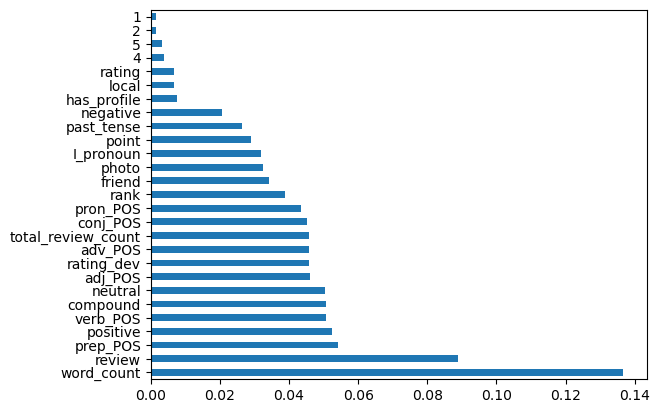

In [207]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming df is your DataFrame
X = merge[ ['rank', 'has_profile', 'friend', 'review', 'photo', 'rating', 
       'local', 'compound', 'positive', 'negative', 'neutral', 'word_count',
       'adj_POS', 'I_pronoun', 'past_tense', 'rating_dev',
       'verb_POS', 'pron_POS', 'adv_POS', 'prep_POS', 'conj_POS',
       'point', 'total_review_count', '5', '4', '2', '1'] ]
y = merge['fake']

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X, y)

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)

feature_importance.nlargest(40).plot(kind='barh')
plt.show()

# machine learning

# XGBoots

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
ML_yelp = merge[['review_count', 'percent', 'point','positive_dev', 'negative_dev',
       'rating_dev','word_count', 'word_25', 'ttr', 'adj_POS', 'verb_POS', 'pron_POS','adv_POS', 'I_pronoun', 'past_tense','compound',
       'review', 'photo', 'friend' ,'fake']]

In [30]:
train_data, test_data = train_test_split(ML_yelp, test_size=0.2, random_state=42)
train_set, validation_set = train_test_split(train_data, test_size=0.2, random_state=42)

In [31]:
X_train = train_set.drop('fake', axis=1)
y_train = train_set['fake']

In [32]:
column_values = y_train.value_counts()

# 打印结果
print(column_values)

0.0    280558
1.0     30962
Name: fake, dtype: int64


In [33]:
# 创建 XGBoost 模型并传递最优参数
xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)

# 5. 在验证集上进行预测
X_validation = validation_set.drop('fake', axis=1)
y_validation = validation_set['fake']
y_pred_validation = xgb_model.predict(X_validation)

X_test = test_data.drop('fake', axis=1)
y_test = test_data['fake']
y_pred_test = xgb_model.predict(X_test)

print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     70046
         1.0       0.74      0.33      0.46      7834

    accuracy                           0.92     77880
   macro avg       0.84      0.66      0.71     77880
weighted avg       0.91      0.92      0.91     77880


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     87845
         1.0       0.74      0.33      0.46      9505

    accuracy                           0.92     97350
   macro avg       0.84      0.66      0.71     97350
weighted avg       0.91      0.92      0.91     97350



In [34]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 定义参数范围
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 创建XGBoost模型
xgb_model = xgb.XGBClassifier()

# 使用网格搜索进行交叉验证
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}


# random forest

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
# Create Random Forest model
#best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 188}
#rf_model = RandomForestClassifier(**best_params)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Validation set predictions
X_validation = validation_set.drop('fake', axis=1)
y_validation = validation_set['fake']
y_pred_validation = rf_model.predict(X_validation)

# Test set predictions
X_test = test_data.drop('fake', axis=1)
y_test = test_data['fake']
y_pred_test = rf_model.predict(X_test)

# Evaluate model performance
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     70046
         1.0       0.77      0.31      0.44      7834

    accuracy                           0.92     77880
   macro avg       0.85      0.65      0.70     77880
weighted avg       0.91      0.92      0.91     77880


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     87845
         1.0       0.78      0.31      0.44      9505

    accuracy                           0.92     97350
   macro avg       0.85      0.65      0.70     97350
weighted avg       0.91      0.92      0.91     97350



In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

# 定义参数范围
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# 创建随机森林模型
rf_model = RandomForestClassifier()

# 使用随机搜索进行交叉验证
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1')
random_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 188}


# logistics regression

In [25]:
# 创建 Logistic Regression 模型
logreg_model = LogisticRegression(random_state=42)

# 训练模型
logreg_model.fit(X_train, y_train)

# 在验证集上进行预测
y_pred_validation = logreg_model.predict(X_validation)

# 在测试集上进行预测
y_pred_test = logreg_model.predict(X_test)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     70093
         1.0       0.65      0.12      0.21      7788

    accuracy                           0.91     77881
   macro avg       0.78      0.56      0.58     77881
weighted avg       0.89      0.91      0.88     77881


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     87731
         1.0       0.65      0.12      0.20      9620

    accuracy                           0.91     97351
   macro avg       0.78      0.56      0.57     97351
weighted avg       0.89      0.91      0.88     97351



In [60]:
logreg_model = LogisticRegression()

# 定义参数范围
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='f1')

# 运行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(X_test)

# 评估模型性能
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linea

C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linea

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     87731
         1.0       0.69      0.16      0.26      9620

    accuracy                           0.91     97351
   macro avg       0.80      0.58      0.61     97351
weighted avg       0.89      0.91      0.88     97351



# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7)  # 5是一个示例，你可以根据需要调整

# 训练模型
knn_model.fit(X_train, y_train)

# 在验证集上进行预测
y_pred_validation = knn_model.predict(X_validation)

# 在测试集上进行预测
y_pred_test = knn_model.predict(X_test)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     70093
         1.0       0.66      0.29      0.41      7788

    accuracy                           0.91     77881
   macro avg       0.79      0.64      0.68     77881
weighted avg       0.90      0.91      0.90     77881


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     87731
         1.0       0.66      0.30      0.41      9620

    accuracy                           0.92     97351
   macro avg       0.79      0.64      0.68     97351
weighted avg       0.90      0.92      0.90     97351



In [30]:
from sklearn.model_selection import GridSearchCV

# 定义参数范围
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# 创建 KNN 模型
knn_model = KNeighborsClassifier()

# 使用网格搜索进行交叉验证
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 7}


# SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='rbf', gamma='scale') 

# 训练模型
svm_model.fit(X_train, y_train)

# 在验证集上进行预测
y_pred_validation = svm_model.predict(X_validation)

# 在测试集上进行预测
y_pred_test = svm_model.predict(X_test)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 创建 SVM 模型
svm_model = SVC()

# 定义参数范围
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# 使用 GridSearchCV 进行交叉验证
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_resampled, y_train_resampled)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

# naive_bayes-BernoulliNB

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = BernoulliNB()

# 训练模型
nb_model.fit(X_train, y_train)

# 在验证集上进行预测
y_pred_validation = nb_model.predict(X_validation)

# 在测试集上进行预测
y_pred_test = nb_model.predict(X_test)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     70093
         1.0       0.30      0.58      0.39      7788

    accuracy                           0.82     77881
   macro avg       0.62      0.71      0.64     77881
weighted avg       0.88      0.82      0.84     77881


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     87731
         1.0       0.30      0.58      0.39      9620

    accuracy                           0.82     97351
   macro avg       0.62      0.71      0.64     97351
weighted avg       0.88      0.82      0.85     97351



In [61]:
bernoulli_nb_model = BernoulliNB()

# 定义参数范围
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'binarize': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(bernoulli_nb_model, param_grid, cv=5, scoring='f1')

# 运行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_bernoulli_nb_model = grid_search.best_estimator_
y_pred = best_bernoulli_nb_model.predict(X_test)

# 评估模型性能
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'alpha': 10, 'binarize': 0.0}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90     87731
         1.0       0.30      0.58      0.39      9620

    accuracy                           0.82     97351
   macro avg       0.62      0.71      0.64     97351
weighted avg       0.88      0.82      0.85     97351

Confusion Matrix:
[[74481 13250]
 [ 4048  5572]]


# DecisionTree

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tree_model = DecisionTreeClassifier(random_state=42)

# 训练模型
tree_model.fit(X_train, y_train)

# 在验证集上进行预测
y_pred_validation = tree_model.predict(X_validation)

# 在测试集上进行预测
y_pred_test = tree_model.predict(X_test)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     70093
         1.0       0.37      0.41      0.39      7788

    accuracy                           0.87     77881
   macro avg       0.65      0.67      0.66     77881
weighted avg       0.88      0.87      0.88     77881

Confusion Matrix:
[[64717  5376]
 [ 4564  3224]]

Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93     87731
         1.0       0.38      0.42      0.40      9620

    accuracy                           0.88     97351
   macro avg       0.66      0.67      0.67     97351
weighted avg       0.88      0.88      0.88     97351

Confusion Matrix:
[[81292  6439]
 [ 5599  4021]]


In [62]:
decision_tree_model = DecisionTreeClassifier()

# 定义参数范围
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建 GridSearchCV 对象
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring='f1')

# 运行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

# 使用最佳参数的模型进行预测
best_decision_tree_model = grid_search.best_estimator_
y_pred = best_decision_tree_model.predict(X_test)

# 评估模型性能
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     87731
         1.0       0.74      0.29      0.42      9620

    accuracy                           0.92     97351
   macro avg       0.84      0.64      0.69     97351
weighted avg       0.91      0.92      0.90     97351



# SMOTE

In [22]:
ML_yelp = merge[['review_count', 'percent', 'point','positive_dev', 'negative_dev',
       'rating_dev','word_count', 'word_25', 'ttr', 'adj_POS', 'verb_POS', 'pron_POS','adv_POS', 'I_pronoun', 'past_tense','compound',
       'review', 'photo', 'friend' ,'fake']]

In [23]:
X = ML_yelp.drop('fake', axis=1)
y = ML_yelp['fake']

In [24]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
X_train_set, X_test_data = train_test_split(X_resampled, test_size=0.2, random_state=42)
X_test_set, X_validation_set = train_test_split(X_test_data, test_size=0.2, random_state=42)
y_train_set, y_test_data = train_test_split(y_resampled, test_size=0.2, random_state=42)
y_test_set, y_validation_set = train_test_split(y_test_data, test_size=0.2, random_state=42)

In [44]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_set, y_train_set)

# 5. 在验证集上进行预测
y_pred_validation = xgb_model.predict(X_validation_set)

y_pred_test = xgb_model.predict(X_test_set)

print("Validation Set Performance:")
print(classification_report(y_validation_set, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test_set, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     17465
         1.0       0.96      0.91      0.94     17611

    accuracy                           0.94     35076
   macro avg       0.94      0.94      0.94     35076
weighted avg       0.94      0.94      0.94     35076


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     70120
         1.0       0.96      0.91      0.94     70184

    accuracy                           0.94    140304
   macro avg       0.94      0.94      0.94    140304
weighted avg       0.94      0.94      0.94    140304



In [50]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 定义参数范围
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 创建XGBoost模型
xgb_model = xgb.XGBClassifier()

# 使用网格搜索进行交叉验证
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_set, y_train_set)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [45]:
# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_set, y_train_set)

# Validation set predictions
y_pred_validation = rf_model.predict(X_validation_set)

# Test set predictions
y_pred_test = rf_model.predict(X_test_set)

# Evaluate model performance
print("Validation Set Performance:")
print(classification_report(y_validation_set, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test_set, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     17465
         1.0       0.96      0.94      0.95     17611

    accuracy                           0.95     35076
   macro avg       0.95      0.95      0.95     35076
weighted avg       0.95      0.95      0.95     35076


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     70120
         1.0       0.96      0.94      0.95     70184

    accuracy                           0.95    140304
   macro avg       0.95      0.95      0.95    140304
weighted avg       0.95      0.95      0.95    140304



In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

# 定义参数范围
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# 创建随机森林模型
rf_model = RandomForestClassifier()

# 使用随机搜索进行交叉验证
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1')
random_search.fit(X_train_set, y_train_set)

# 输出最佳参数
print("Best Parameters:", random_search.best_params_)

KeyboardInterrupt: 

In [46]:
# 创建 Logistic Regression 模型
logreg_model = LogisticRegression(random_state=42)

# 训练模型
logreg_model.fit(X_train_set, y_train_set)

# 在验证集上进行预测
y_pred_validation = logreg_model.predict(X_validation_set)

# 在测试集上进行预测
y_pred_test = logreg_model.predict(X_test_set)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation_set, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test_set, y_pred_test))

C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.76      0.65      0.70     17465
         1.0       0.70      0.80      0.75     17611

    accuracy                           0.73     35076
   macro avg       0.73      0.73      0.72     35076
weighted avg       0.73      0.73      0.72     35076


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.77      0.66      0.71     70120
         1.0       0.70      0.80      0.75     70184

    accuracy                           0.73    140304
   macro avg       0.73      0.73      0.73    140304
weighted avg       0.73      0.73      0.73    140304



In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # 5是一个示例，你可以根据需要调整

# 训练模型
knn_model.fit(X_train_set, y_train_set)

# 在验证集上进行预测
y_pred_validation = knn_model.predict(X_validation_set)

# 在测试集上进行预测
y_pred_test = knn_model.predict(X_test_set)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation_set, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test_set, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87     17465
         1.0       0.83      0.97      0.89     17611

    accuracy                           0.88     35076
   macro avg       0.89      0.88      0.88     35076
weighted avg       0.89      0.88      0.88     35076


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87     70120
         1.0       0.83      0.97      0.89     70184

    accuracy                           0.88    140304
   macro avg       0.89      0.88      0.88    140304
weighted avg       0.89      0.88      0.88    140304



In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = BernoulliNB()

# 训练模型
nb_model.fit(X_train_set, y_train_set)

# 在验证集上进行预测
y_pred_validation = nb_model.predict(X_validation_set)

# 在测试集上进行预测
y_pred_test = nb_model.predict(X_test_set)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation_set, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test_set, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72     17465
         1.0       0.73      0.69      0.71     17611

    accuracy                           0.71     35076
   macro avg       0.71      0.71      0.71     35076
weighted avg       0.71      0.71      0.71     35076


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72     70120
         1.0       0.73      0.69      0.70     70184

    accuracy                           0.71    140304
   macro avg       0.71      0.71      0.71    140304
weighted avg       0.71      0.71      0.71    140304



In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tree_model = DecisionTreeClassifier(random_state=42)

# 训练模型
tree_model.fit(X_train_set, y_train_set)

# 在验证集上进行预测
y_pred_validation = tree_model.predict(X_validation_set)

# 在测试集上进行预测
y_pred_test = tree_model.predict(X_test_set)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation_set, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test_set, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91     17465
         1.0       0.90      0.92      0.91     17611

    accuracy                           0.91     35076
   macro avg       0.91      0.91      0.91     35076
weighted avg       0.91      0.91      0.91     35076


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91     70120
         1.0       0.90      0.92      0.91     70184

    accuracy                           0.91    140304
   macro avg       0.91      0.91      0.91    140304
weighted avg       0.91      0.91      0.91    140304



# EasyEnsemble

In [45]:
from sklearn.model_selection import train_test_split
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
# 使用 RandomUnderSampler 进行欠采样
rus = RandomUnderSampler(random_state=42)
X_train_sampled, y_train_sampled = rus.fit_resample(X_train, y_train)

# 使用 RandomOverSampler 进行过采样
ros = RandomOverSampler(random_state=42)
X_train_sampled, y_train_sampled = ros.fit_resample(X_train_sampled, y_train_sampled)

# 创建 EasyEnsembleClassifier
ee_model = EasyEnsembleClassifier(random_state=42)

# 训练 EasyEnsembleClassifier
ee_model.fit(X_train_sampled, y_train_sampled)

EasyEnsembleClassifier(random_state=42)

In [57]:
column_values = y_train_sampled.value_counts()

# 打印结果
print(column_values)

0.0    30897
1.0    30897
Name: fake, dtype: int64


In [49]:
# 创建 XGBoost 模型
xgb_model = XGBClassifier()

# 训练 XGBoost 模型
xgb_model.fit(X_train_sampled, y_train_sampled)

# 在验证集上进行预测
y_pred_validation = xgb_model.predict(X_validation)

# 在测试集上进行预测
y_pred_test = xgb_model.predict(X_test)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87     70093
         1.0       0.30      0.83      0.45      7788

    accuracy                           0.79     77881
   macro avg       0.64      0.81      0.66     77881
weighted avg       0.91      0.79      0.83     77881


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87     87731
         1.0       0.30      0.82      0.44      9620

    accuracy                           0.79     97351
   macro avg       0.64      0.81      0.66     97351
weighted avg       0.91      0.79      0.83     97351



In [50]:
# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sampled, y_train_sampled)

# Validation set predictions
X_validation = validation_set.drop('fake', axis=1)
y_validation = validation_set['fake']
y_pred_validation = rf_model.predict(X_validation)

# Test set predictions
X_test = test_data.drop('fake', axis=1)
y_test = test_data['fake']
y_pred_test = rf_model.predict(X_test)

# Evaluate model performance
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87     70093
         1.0       0.30      0.84      0.44      7788

    accuracy                           0.79     77881
   macro avg       0.64      0.81      0.66     77881
weighted avg       0.91      0.79      0.83     77881


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.98      0.79      0.87     87731
         1.0       0.30      0.83      0.44      9620

    accuracy                           0.79     97351
   macro avg       0.64      0.81      0.66     97351
weighted avg       0.91      0.79      0.83     97351



In [51]:
# 创建 Logistic Regression 模型
logreg_model = LogisticRegression(random_state=42)

# 训练模型
logreg_model.fit(X_train_sampled, y_train_sampled)

# 在验证集上进行预测
y_pred_validation = logreg_model.predict(X_validation)

# 在测试集上进行预测
y_pred_test = logreg_model.predict(X_test)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

C:\Users\10047\Anaconda3\envs\new\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     70093
         1.0       0.24      0.79      0.37      7788

    accuracy                           0.73     77881
   macro avg       0.61      0.76      0.60     77881
weighted avg       0.90      0.73      0.78     77881


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     87731
         1.0       0.24      0.79      0.37      9620

    accuracy                           0.74     97351
   macro avg       0.61      0.76      0.60     97351
weighted avg       0.90      0.74      0.79     97351



In [52]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # 5是一个示例，你可以根据需要调整

# 训练模型
knn_model.fit(X_train_sampled, y_train_sampled)

# 在验证集上进行预测
y_pred_validation = knn_model.predict(X_validation)

# 在测试集上进行预测
y_pred_test = knn_model.predict(X_test)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83     70093
         1.0       0.24      0.76      0.37      7788

    accuracy                           0.74     77881
   macro avg       0.60      0.75      0.60     77881
weighted avg       0.89      0.74      0.79     77881


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     87731
         1.0       0.24      0.76      0.37      9620

    accuracy                           0.74     97351
   macro avg       0.60      0.75      0.60     97351
weighted avg       0.89      0.74      0.79     97351



In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = BernoulliNB()

# 训练模型
nb_model.fit(X_train_sampled, y_train_sampled)

# 在验证集上进行预测
y_pred_validation = nb_model.predict(X_validation)

# 在测试集上进行预测
y_pred_test = nb_model.predict(X_test)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     70093
         1.0       0.23      0.77      0.36      7788

    accuracy                           0.73     77881
   macro avg       0.60      0.74      0.59     77881
weighted avg       0.89      0.73      0.78     77881


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     87731
         1.0       0.23      0.77      0.36      9620

    accuracy                           0.73     97351
   macro avg       0.60      0.74      0.59     97351
weighted avg       0.89      0.73      0.78     97351



In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tree_model = DecisionTreeClassifier(random_state=42)

# 训练模型
tree_model.fit(X_train_sampled, y_train_sampled)

# 在验证集上进行预测
y_pred_validation = tree_model.predict(X_validation)

# 在测试集上进行预测
y_pred_test = tree_model.predict(X_test)

# 评估模型性能
print("Validation Set Performance:")
print(classification_report(y_validation, y_pred_validation))

print("\nTest Set Performance:")
print(classification_report(y_test, y_pred_test))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83     70093
         1.0       0.23      0.73      0.35      7788

    accuracy                           0.73     77881
   macro avg       0.59      0.73      0.59     77881
weighted avg       0.89      0.73      0.78     77881


Test Set Performance:
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83     87731
         1.0       0.23      0.73      0.35      9620

    accuracy                           0.73     97351
   macro avg       0.59      0.73      0.59     97351
weighted avg       0.89      0.73      0.78     97351



In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 设定目标采样比例
target_ratio = 0.5  # 假设你想要正类别和负类别的样本比例为1:5

# 定义 RandomOverSampler 和 RandomUnderSampler
over_sampler = RandomOverSampler(sampling_strategy=target_ratio)
under_sampler = RandomUnderSampler(sampling_strategy=target_ratio)

# 创建 Pipeline，先进行下采样再进行上采样
sampling_pipeline = Pipeline([
    ('under_sampler', under_sampler),
    ('over_sampler', over_sampler)
])

# 在训练集上应用 Pipeline
X_resampled, y_resampled = sampling_pipeline.fit_resample(X_train, y_train)

# 创建并训练模型
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 评估模型性能
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))